Оглавление
+ [1. Готовим данные](#Headers)
+ [2. Обучаем модели, анализируем метрики](#Headersssss)
+ [3. Выводы](#Headersssss)

# 1. Готовим данные

## 1.1 Импорт датасета и библиотек для предобработки

In [74]:
import pandas as pd
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [205]:
my_data = pd.read_csv('https://drive.google.com/file/d/1eQXG7q9vgaUpv6ZWN6cp1_AZBs-U4Lsy/view?usp=sharing')
display(my_data.head(30))
my_data.info()

# my_data = pd.read_csv('https://drive.google.com/file/d/1eQXG7q9vgaUpLsy/view?usp=sharing')v6ZWN6cp1_AZBs-U4

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
15         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
16         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
17         Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
18         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
19         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
20         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
21    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Поскольку общее количество наблюдений составляет 1460, а число признаков гораздо меньше (81), это является одним из условий применения методов регрессии.

## 1.2 Дискретные признаки

### Корреляция

<AxesSubplot:>

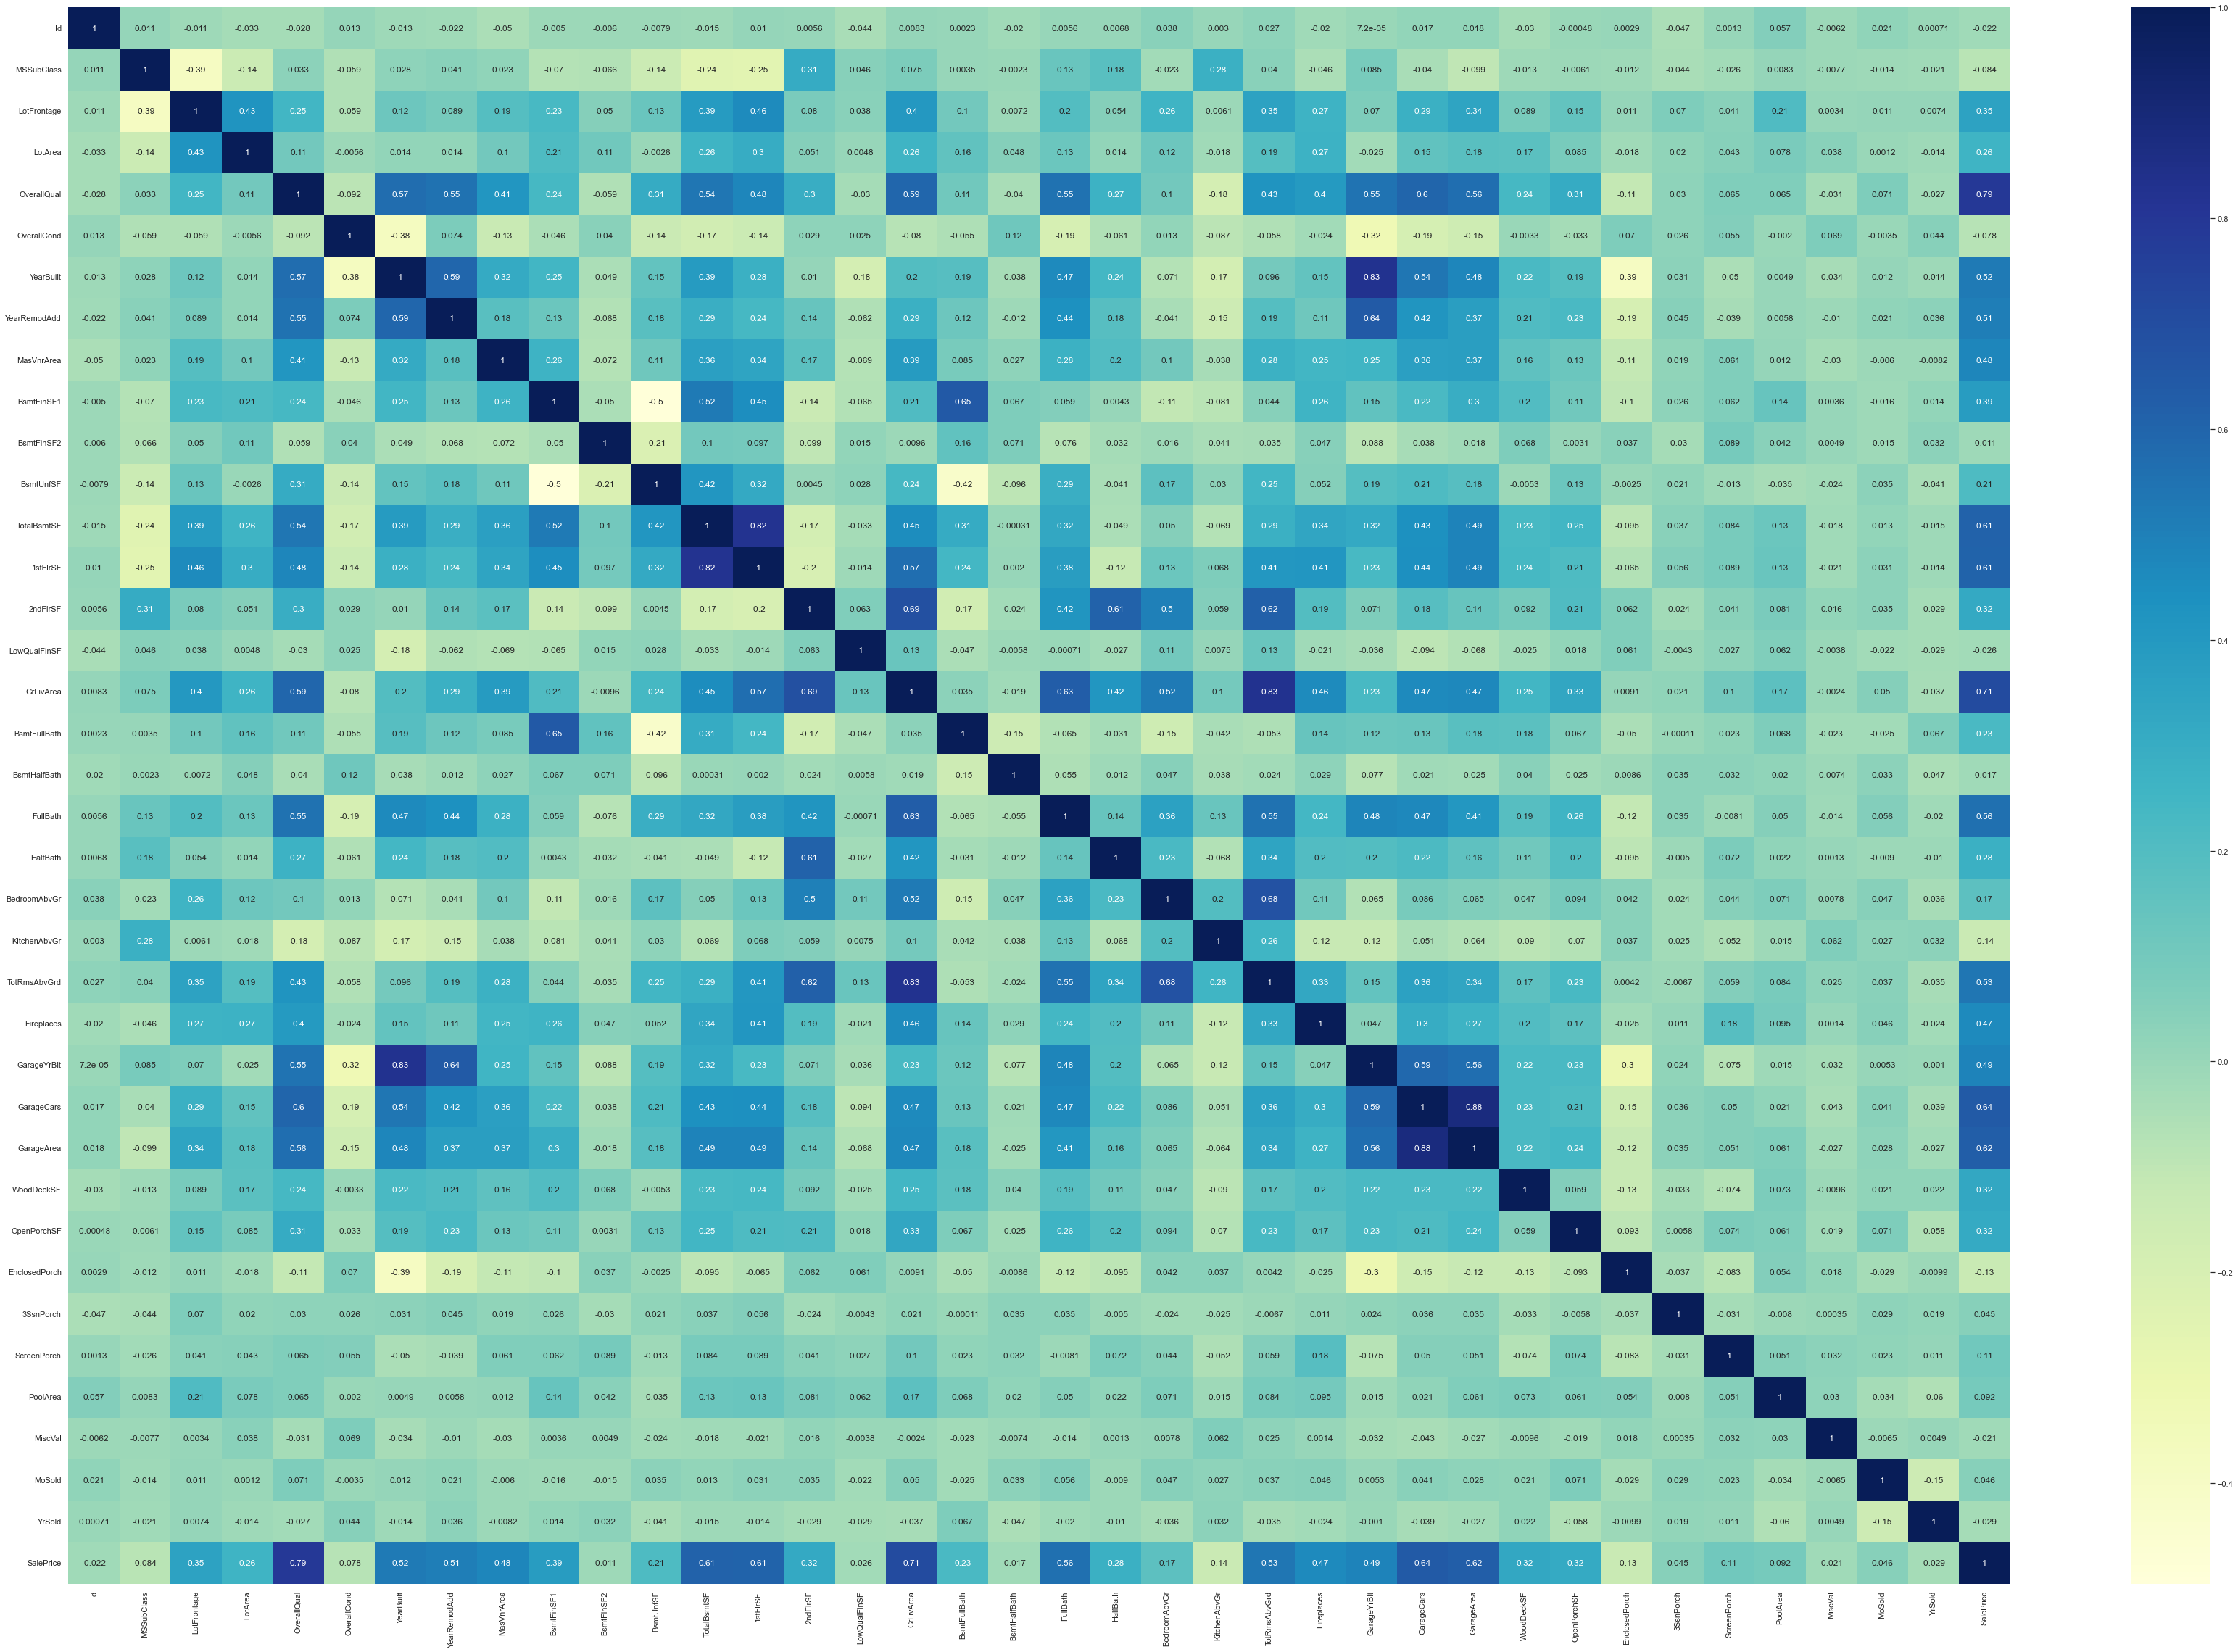

In [14]:
sns.set(rc = {'figure.figsize':(60,40)})
sns.heatmap(my_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [ ]:
## Примем допустимый порог корреляции в 70%.
# Наибольшую взаимную корреляцию имеют столбцы GarageYrBlt и YearBlt(0,83), TotRmsAbvGrd и GrLivArea (0,83), 1stFlrSF и TotBsmtSF (0,82), 
# GarageArea и GarageCars (0,88). Удалим первые из названных.
# Признак OverallQual имеет высокую корреляцию с многими другими, поэтому удалим его.
# 5 признаков имеют минимальную корреляцию с целевым признаком SalePrice (в пределах +-0,03), как положительную, так и отрицательную: 
# BsmtFinSF2, LowQualFinSF, BsmtHalfBath, MiscVal, YrSold. Предел +-0,03 выбран из-за того, что признак Id имеет корреляцию -0,02. 
# Эти столбцы удалим.
# Всего удаляем 11 столбцов.

In [206]:
my_data = my_data.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea', 'OverallQual', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold'], axis=1)
my_data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea  \
0            Lvl    AllPub    Inside  ...         0           0        0   
1            Lvl    AllPub       FR2  ...         0           0        0   
2            Lvl    AllPub    Inside  ...         0           0        0   
3            Lvl    AllPub    Corner  ...         0           0        0   
4            Lvl    AllPub       FR2  ...         0           0        0   
...          ...       ...       ...  ...       ...         ...      ...   
1455         Lvl    AllPub    Inside  ...         0           0        0   
1456         Lvl    AllPub    Inside  ...         0           0        0   
1457         Lvl    AllPub    Inside  ...         0           0        0   
1458         Lvl    AllPub    Inside  ...         0           0        0   
1459         Lvl    AllPub    Inside  ...         0           0        0   

     PoolQC  Fence MiscFeature  MoSold  SaleType  SaleCondition SalePrice  
0       NaN    NaN         NaN       2        WD         Normal    208500  
1       NaN    NaN         NaN       5        WD         Normal    181500  
2       NaN    NaN         NaN       9        WD         Normal    223500  
3       NaN    NaN         NaN       2        WD        Abnorml    140000  
4       NaN    NaN         NaN      12        WD         Normal    250000  
...     ...    ...         ...     ...       ...            ...       ...  
1455    NaN    NaN         NaN       8        WD         Normal    175000  
1456    NaN  MnPrv         NaN       2        WD         Normal    210000  
1457    NaN  GdPrv        Shed       5        WD         Normal    266500  
1458    NaN    NaN         NaN       4        WD         Normal    142125  
1459    NaN    NaN         NaN       6        WD         Normal    147500  

[1460 rows x 70 columns]

### Дубликаты

In [164]:
print(f"Дубликатов в датасете: {my_data.duplicated().sum()}")

Дубликатов в датасете: 0


### Пропуски

In [207]:
discreet_data = my_data.select_dtypes(include = ['int64', 'float64'])

for col in discreet_data.columns:
    
    cols_null_percent = discreet_data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

display(cols_with_null)


LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64

In [208]:
# Поскольку доля пропусков невелика, заполним их нулями.

discreet_data.fillna(value=0, inplace=True)

for col in discreet_data.columns:
    pct_missing = np.mean(discreet_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

MSSubClass - 0%
LotFrontage - 0%
LotArea - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
MasVnrArea - 0%
BsmtFinSF1 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
2ndFlrSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
Fireplaces - 0%
GarageCars - 0%
WoodDeckSF - 0%
OpenPorchSF - 0%
EnclosedPorch - 0%
3SsnPorch - 0%
ScreenPorch - 0%
PoolArea - 0%
MoSold - 0%
SalePrice - 0%


### Выбросы

In [183]:
my_data.describe()

MSSubClass  LotFrontage        LotArea  OverallCond    YearBuilt  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    57.623288   10516.828082     5.575342  1971.267808   
std      42.300571    34.664304    9981.264932     1.112799    30.202904   
min      20.000000     0.000000    1300.000000     1.000000  1872.000000   
25%      20.000000    42.000000    7553.500000     5.000000  1954.000000   
50%      50.000000    63.000000    9478.500000     5.000000  1973.000000   
75%      70.000000    79.000000   11601.500000     6.000000  2000.000000   
max     190.000000   313.000000  215245.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726   567.240411  1057.429452  ...   
std       20.645407   180.731373   456.098091   441.866955   438.705324  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%     1994.000000     0.000000   383.500000   477.500000   991.500000  ...   
75%     2004.000000   164.250000   712.250000   808.000000  1298.250000  ...   
max     2010.000000  1600.000000  5644.000000  2336.000000  6110.000000  ...   

        Fireplaces   GarageCars   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      0.613014     1.767123    94.244521    46.660274      21.954110   
std       0.644666     0.747315   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     1.000000     0.000000     0.000000       0.000000   
50%       1.000000     2.000000     0.000000    25.000000       0.000000   
75%       1.000000     2.000000   168.000000    68.000000       0.000000   
max       3.000000     4.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MoSold      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     6.321918  180921.195890  
std      29.317331    55.757415    40.177307     2.703626   79442.502883  
min       0.000000     0.000000     0.000000     1.000000   34900.000000  
25%       0.000000     0.000000     0.000000     5.000000  129975.000000  
50%       0.000000     0.000000     0.000000     6.000000  163000.000000  
75%       0.000000     0.000000     0.000000     8.000000  214000.000000  
max     508.000000   480.000000   738.000000    12.000000  755000.000000  

[8 rows x 27 columns]

#### Метод Тьюки (примем за выброс 1,5 межквартильных размаха)
Построим гистограммы исходных и очищенных данных по всем столбцам с выбросами

C:\Users\ttnch\AppData\Local\Temp\ipykernel_8468\2048294366.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))


Столбцы с выбросами: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice']


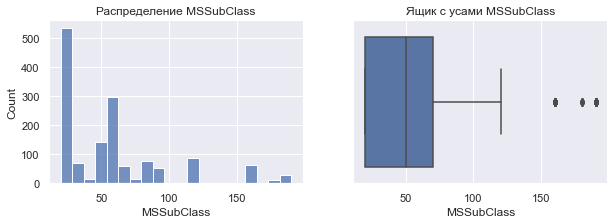

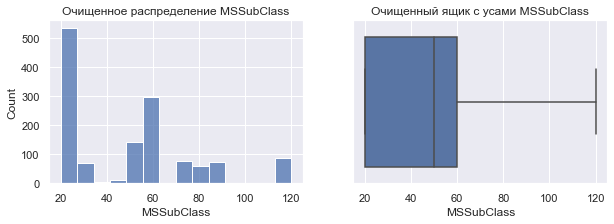

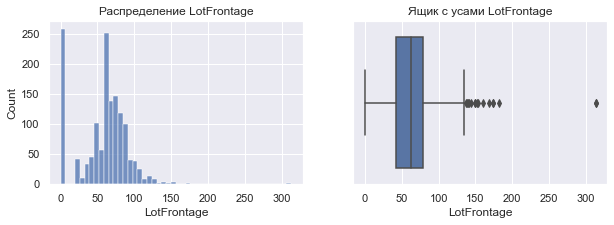

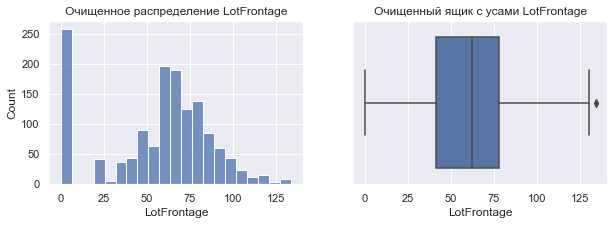

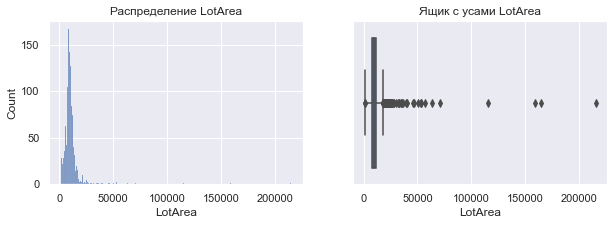

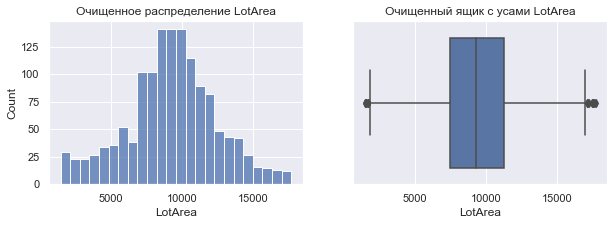

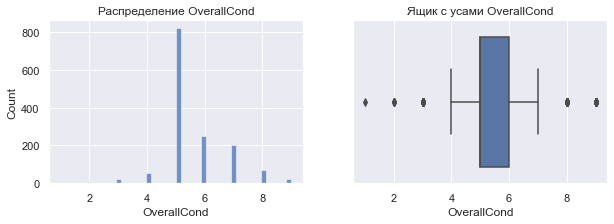

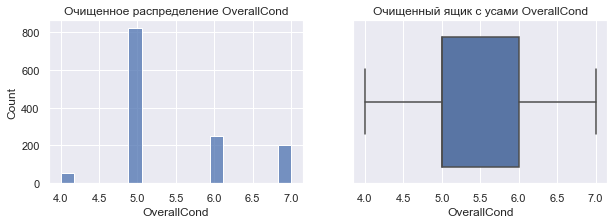

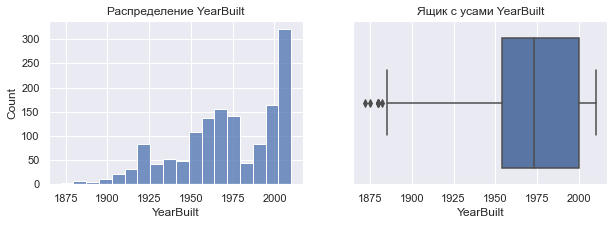

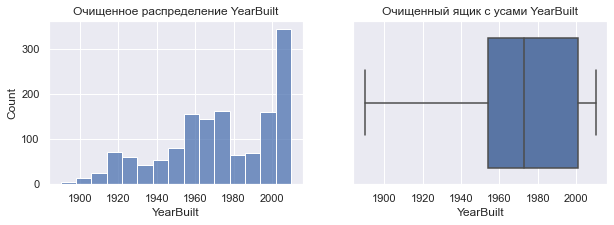

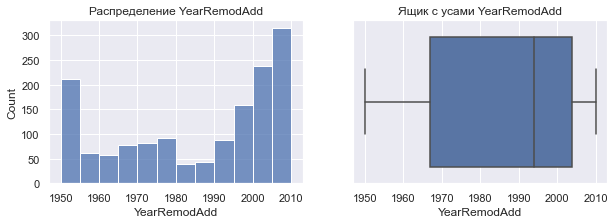

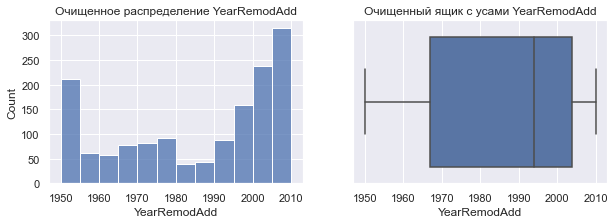

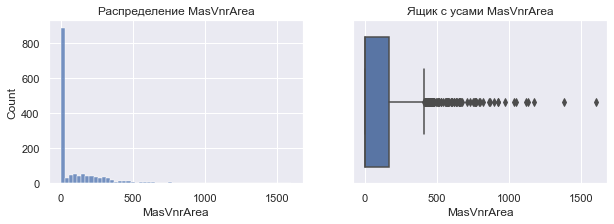

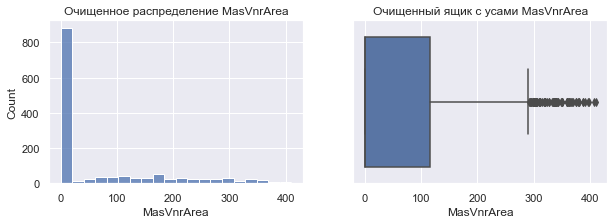

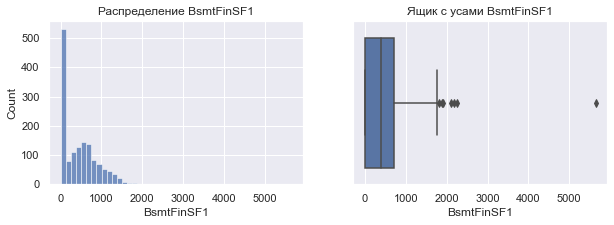

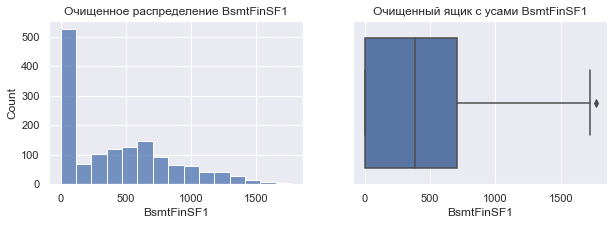

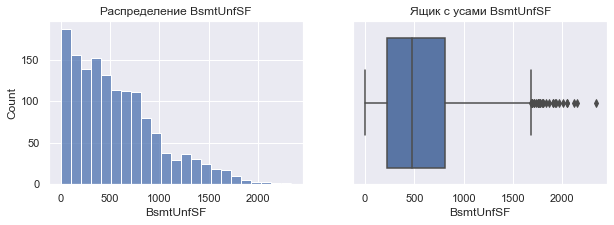

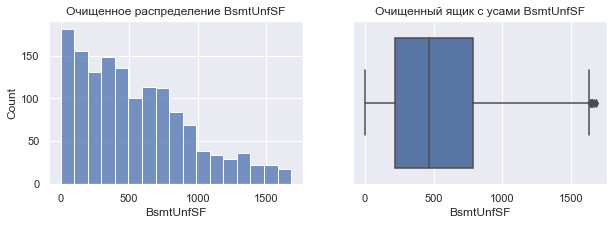

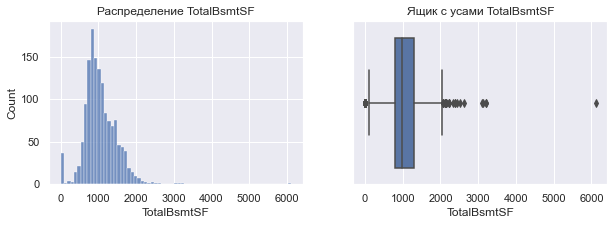

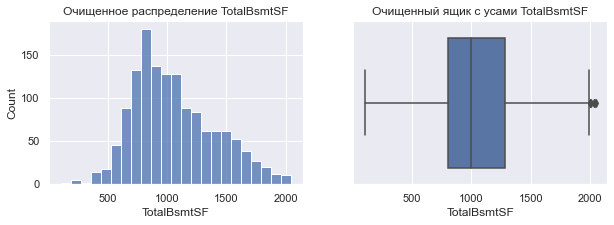

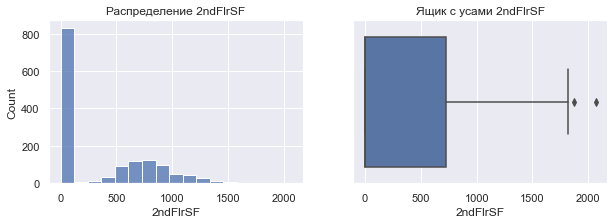

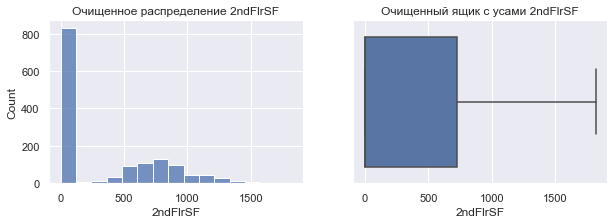

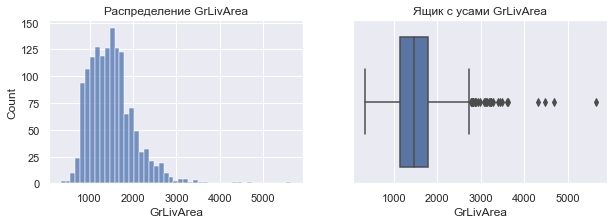

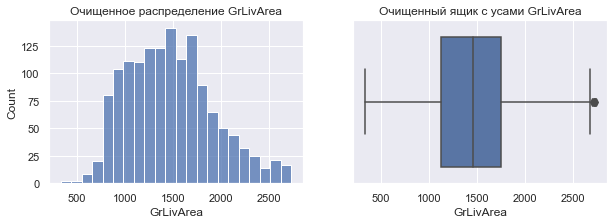

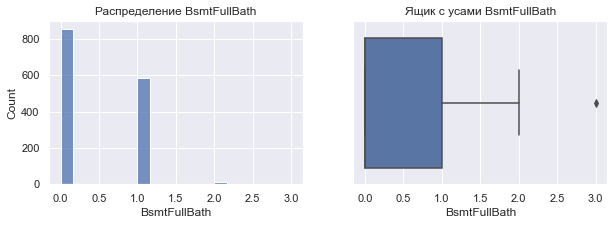

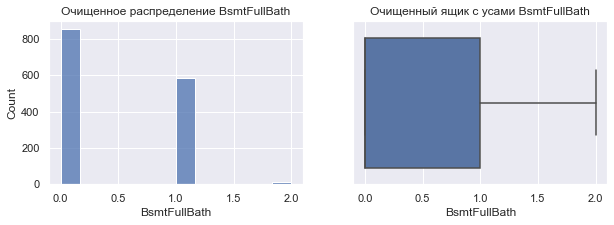

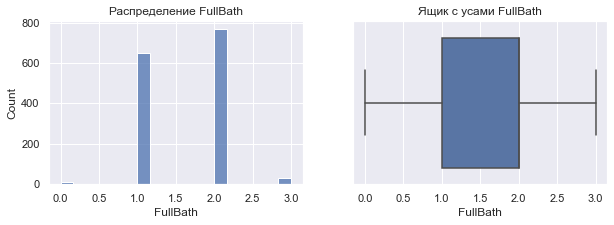

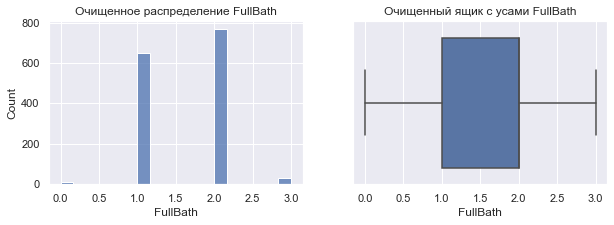

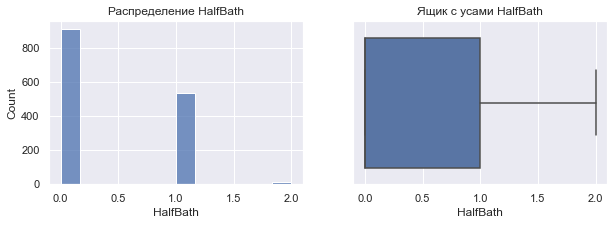

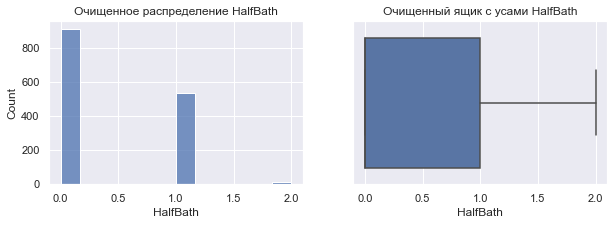

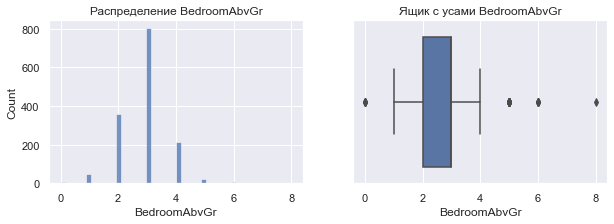

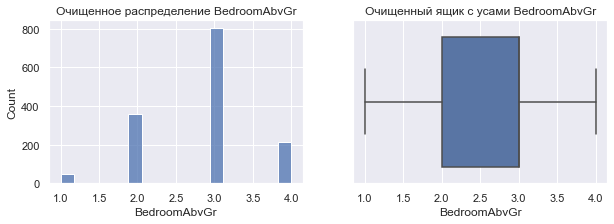

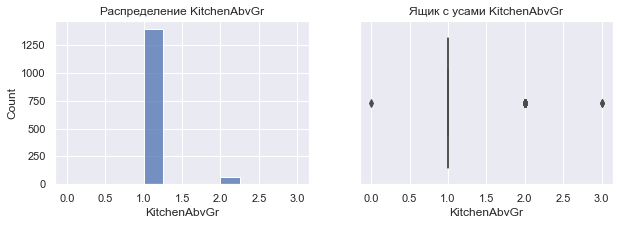

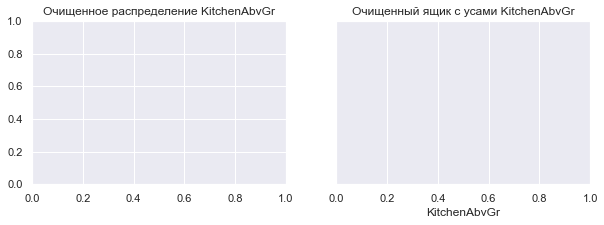

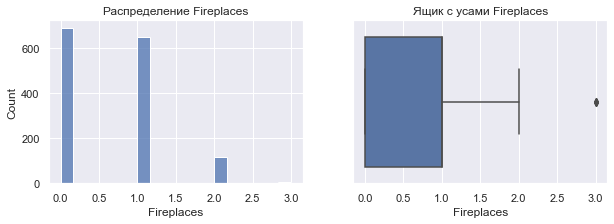

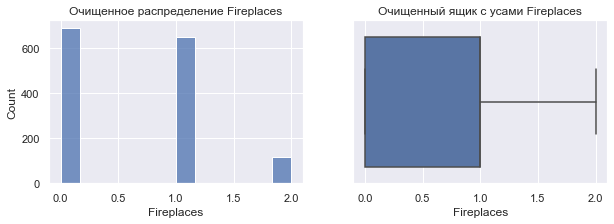

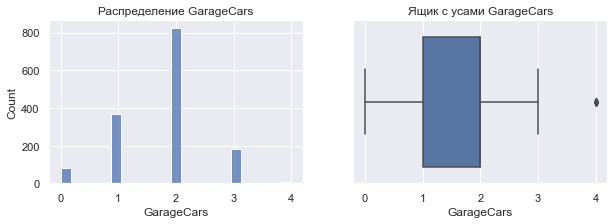

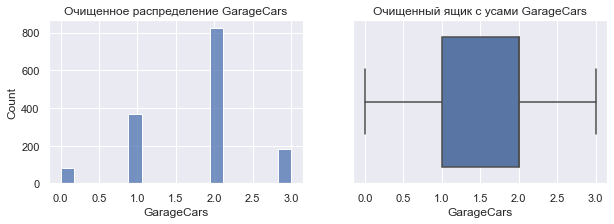

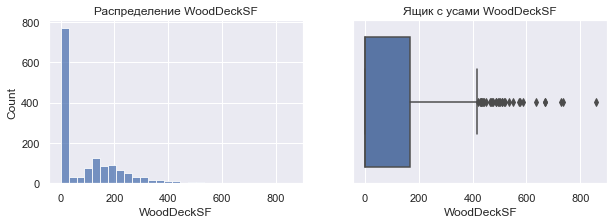

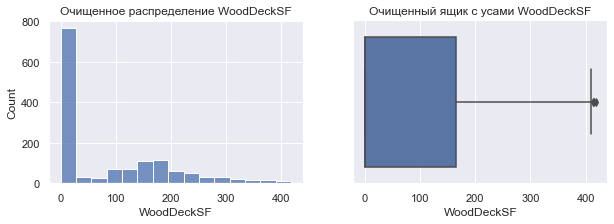

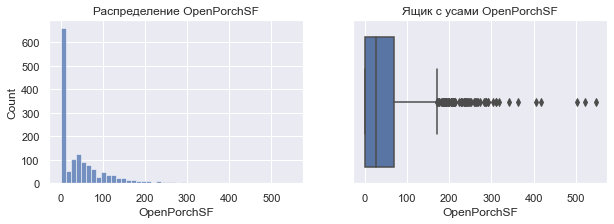

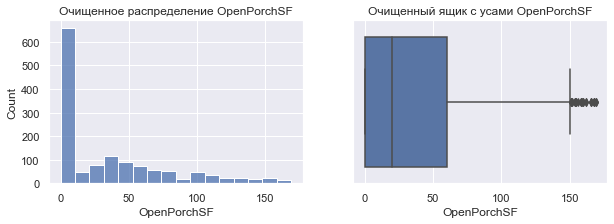

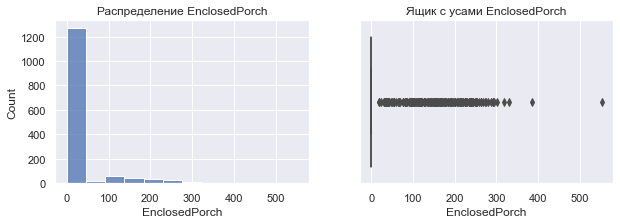

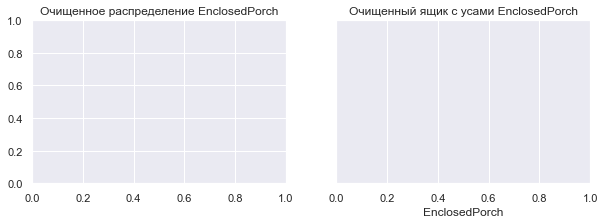

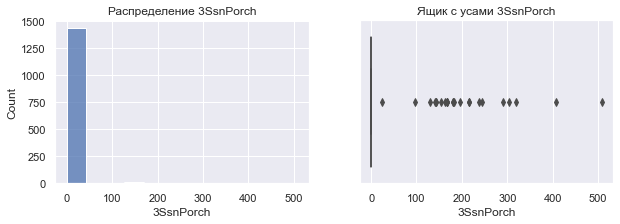

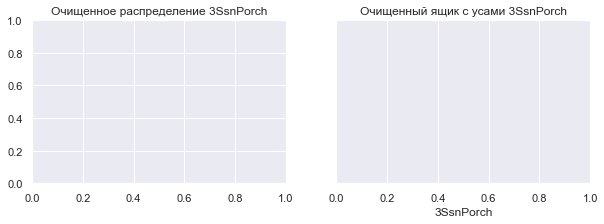

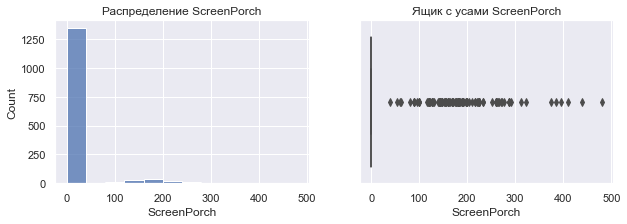

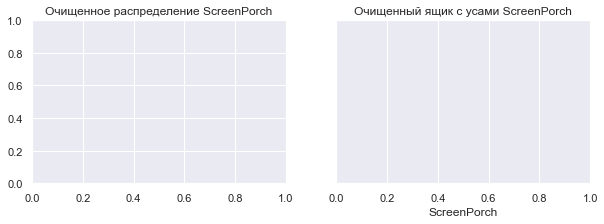

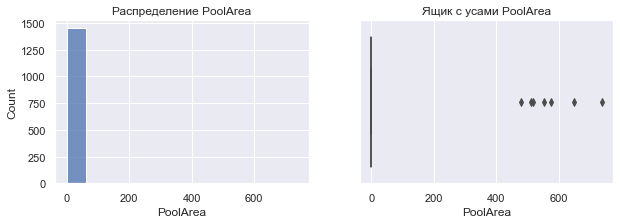

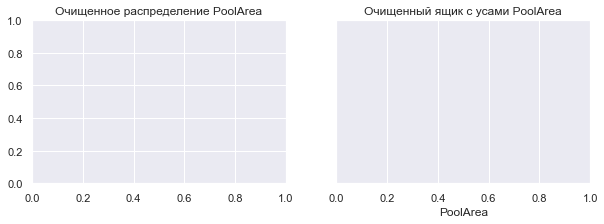

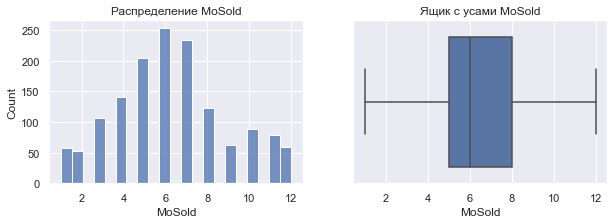

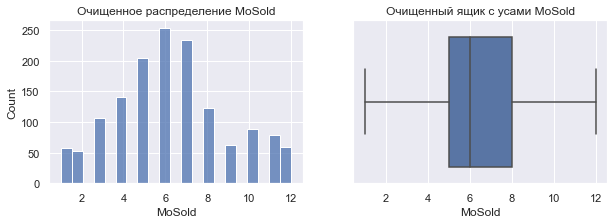

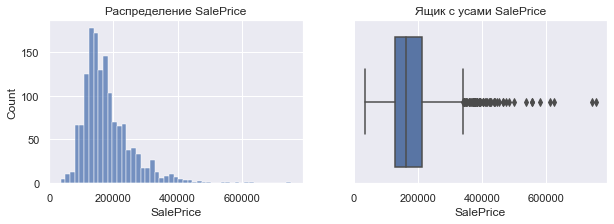

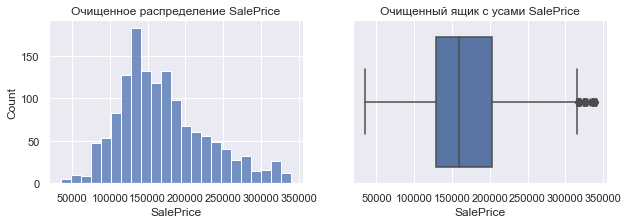

In [209]:
num_data = my_data.select_dtypes(include=np.number) 

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outlier_columns = []
for col in num_data.columns:
    outliers, cleaned = outliers_iqr(num_data, col)
    outlier_columns.append(col)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    histplot = sns.histplot(data=my_data, x=col, ax=axes[0])
    histplot.set_title(f'Распределение {col}')
    boxplot = sns.boxplot(data=my_data, x=col, ax=axes[1])
    boxplot.set_title(f'Ящик с усами {col}')   
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    histplot = sns.histplot(data=cleaned, x=col, ax=axes[0])
    histplot.set_title(f'Очищенное распределение {col}')
    boxplot = sns.boxplot(data=cleaned, x=col, ax=axes[1])
    boxplot.set_title(f'Очищенный ящик с усами {col}')
    
print(f'Столбцы с выбросами: {outlier_columns}')

На основании диаграмм примем решения по каждому из столбцов: 

'MSSubClass', 'YearBuilt', 'Fireplaces', 'BsmtFullBath' - после очистки сильных выбросов нет. 

'OverallCond', 'BedroomAbvGr', 'GarageCars' - распределение нормальное, после очистки сильных выбросов нет.

'YearRemodAdd', 'MoSold' - значения не изменились, оставляем как есть.

'LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea' - повторно убрать выбросы, увеличив интервал.

'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF’ - факторизовать, чтобы снять влияние '0'.

'FullBath', 'HalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea' - очевидно, категориальные признаки, их необходимо факторизовать.

#### Дальнейшая обработка выбросов

c:\Users\ttnch\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\ttnch\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\ttnch\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\ttnch\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


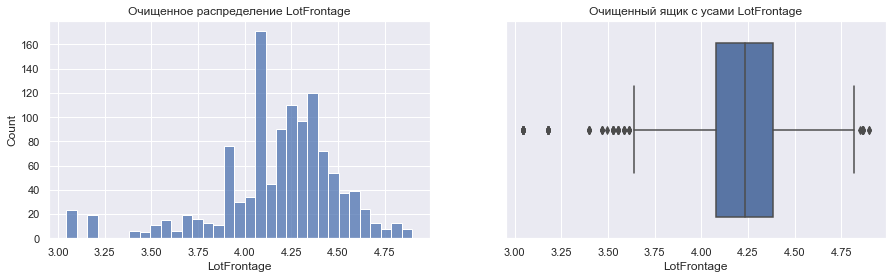

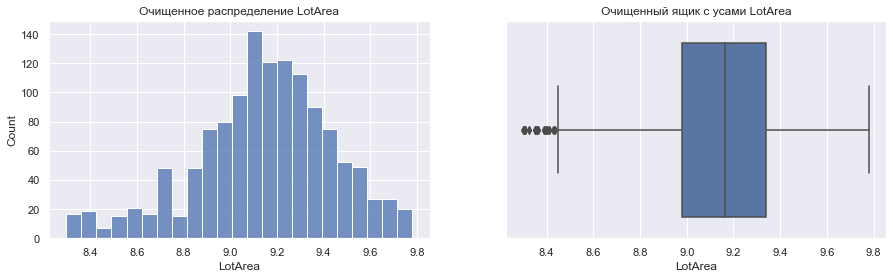

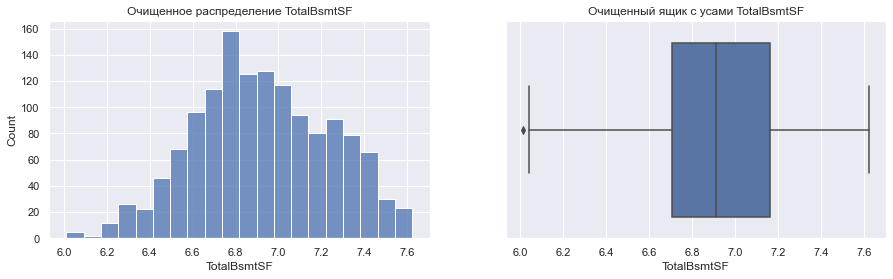

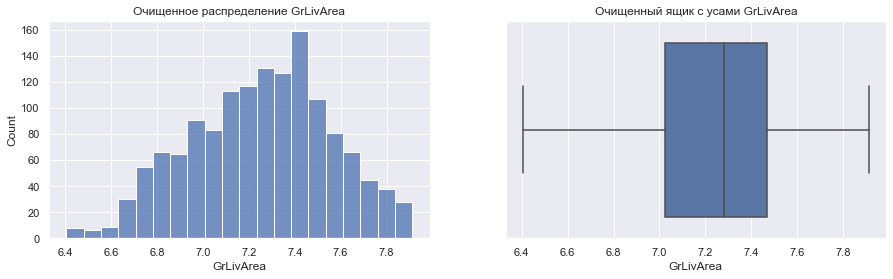

In [210]:
 # увеличиваем интервал для признаков, где еще остались выбросы, и проверяем на графиках

num_data = my_data.select_dtypes(include=[np.number]) 

list = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea']

for col in list:
    outliers, cleaned = outliers_iqr(num_data, col)
    log_data = np.log(cleaned)
    new_outliers, new_cleaned = outliers_iqr(log_data, col)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    histplot = sns.histplot(data=new_cleaned, x=col, ax=axes[0])
    histplot.set_title(f'Очищенное распределение {col}')
    boxplot = sns.boxplot(data=new_cleaned, x=col, ax=axes[1])
    boxplot.set_title(f'Очищенный ящик с усами {col}')  


In [ ]:
# Признаки LotArea и TotalBsmtSF все еще имеют выбросы, но пока остановимся на этом.
# Факторизуем категориальные признаки, выявленные выше в цифровых признаках.

In [211]:
list1 = ['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for col in list1:
    cleaned[col].factorize()
cleaned

MSSubClass  LotFrontage  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0             60         65.0     8450            5       2003          2003   
1             20         80.0     9600            8       1976          1976   
2             60         68.0    11250            5       2001          2002   
3             70         60.0     9550            5       1915          1970   
4             60         84.0    14260            5       2000          2000   
...          ...          ...      ...          ...        ...           ...   
1455          60         62.0     7917            5       1999          2000   
1456          20         85.0    13175            6       1978          1988   
1457          70         66.0     9042            9       1941          2006   
1458          20         68.0     9717            6       1950          1996   
1459          20         75.0     9937            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  Fireplaces  \
0          196.0         706        150          856  ...           0   
1            0.0         978        284         1262  ...           1   
2          162.0         486        434          920  ...           1   
3            0.0         216        540          756  ...           1   
4          350.0         655        490         1145  ...           1   
...          ...         ...        ...          ...  ...         ...   
1455         0.0           0        953          953  ...           1   
1456       119.0         790        589         1542  ...           2   
1457         0.0         275        877         1152  ...           2   
1458         0.0          49          0         1078  ...           0   
1459         0.0         830        136         1256  ...           0   

      GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0              2           0           61              0          0   
1              2         298            0              0          0   
2              2           0           42              0          0   
3              3           0           35            272          0   
4              3         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455           2           0           40              0          0   
1456           2         349            0              0          0   
1457           1           0           60              0          0   
1458           1         366            0            112          0   
1459           1         736           68              0          0   

      ScreenPorch  PoolArea  MoSold  SalePrice  
0               0         0       2     208500  
1               0         0       5     181500  
2               0         0       9     223500  
3               0         0       2     140000  
4               0         0      12     250000  
...           ...       ...     ...        ...  
1455            0         0       8     175000  
1456            0         0       2     210000  
1457            0         0       5     266500  
1458            0         0       4     142125  
1459            0         0       6     147500  

[1429 rows x 27 columns]

## 1.3 Категориальные признаки

### Факторизация

In [212]:
object_data = my_data.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
for col in object_data.columns:
    object_data[col] = LabelEncoder().fit_transform(object_data[col])
object_data

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      2         3            3          0          4   
1            3       1      2         3            3          0          2   
2            3       1      2         0            3          0          4   
3            3       1      2         0            3          0          0   
4            3       1      2         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      2         3            3          0          4   
1456         3       1      2         3            3          0          4   
1457         3       1      2         3            3          0          4   
1458         3       1      2         3            3          0          4   
1459         3       1      2         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0             0             5           2  ...           1             1   
1             0            24           1  ...           1             1   
2             0             5           2  ...           1             1   
3             0             6           2  ...           5             2   
4             0            15           2  ...           1             1   
...         ...           ...         ...  ...         ...           ...   
1455          0             8           2  ...           1             1   
1456          0            14           2  ...           1             2   
1457          0             6           2  ...           1             1   
1458          0            12           2  ...           1             2   
1459          0             7           2  ...           1             0   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
0              4           4           2       3      4            4   
1              4           4           2       3      4            4   
2              4           4           2       3      4            4   
3              4           4           2       3      4            4   
4              4           4           2       3      4            4   
...          ...         ...         ...     ...    ...          ...   
1455           4           4           2       3      4            4   
1456           4           4           2       3      2            4   
1457           4           4           2       3      0            2   
1458           4           4           2       3      4            4   
1459           4           4           2       3      4            4   

      SaleType  SaleCondition  
0            8              4  
1            8              4  
2            8              4  
3            8              0  
4            8              4  
...        ...            ...  
1455         8              4  
1456         8              4  
1457         8              4  
1458         8              4  
1459         8              4  

[1460 rows x 43 columns]

### Пропуски

In [222]:
object_data = object_data.fillna(0)

Series([], dtype: float64)

### Корреляция

<AxesSubplot:>

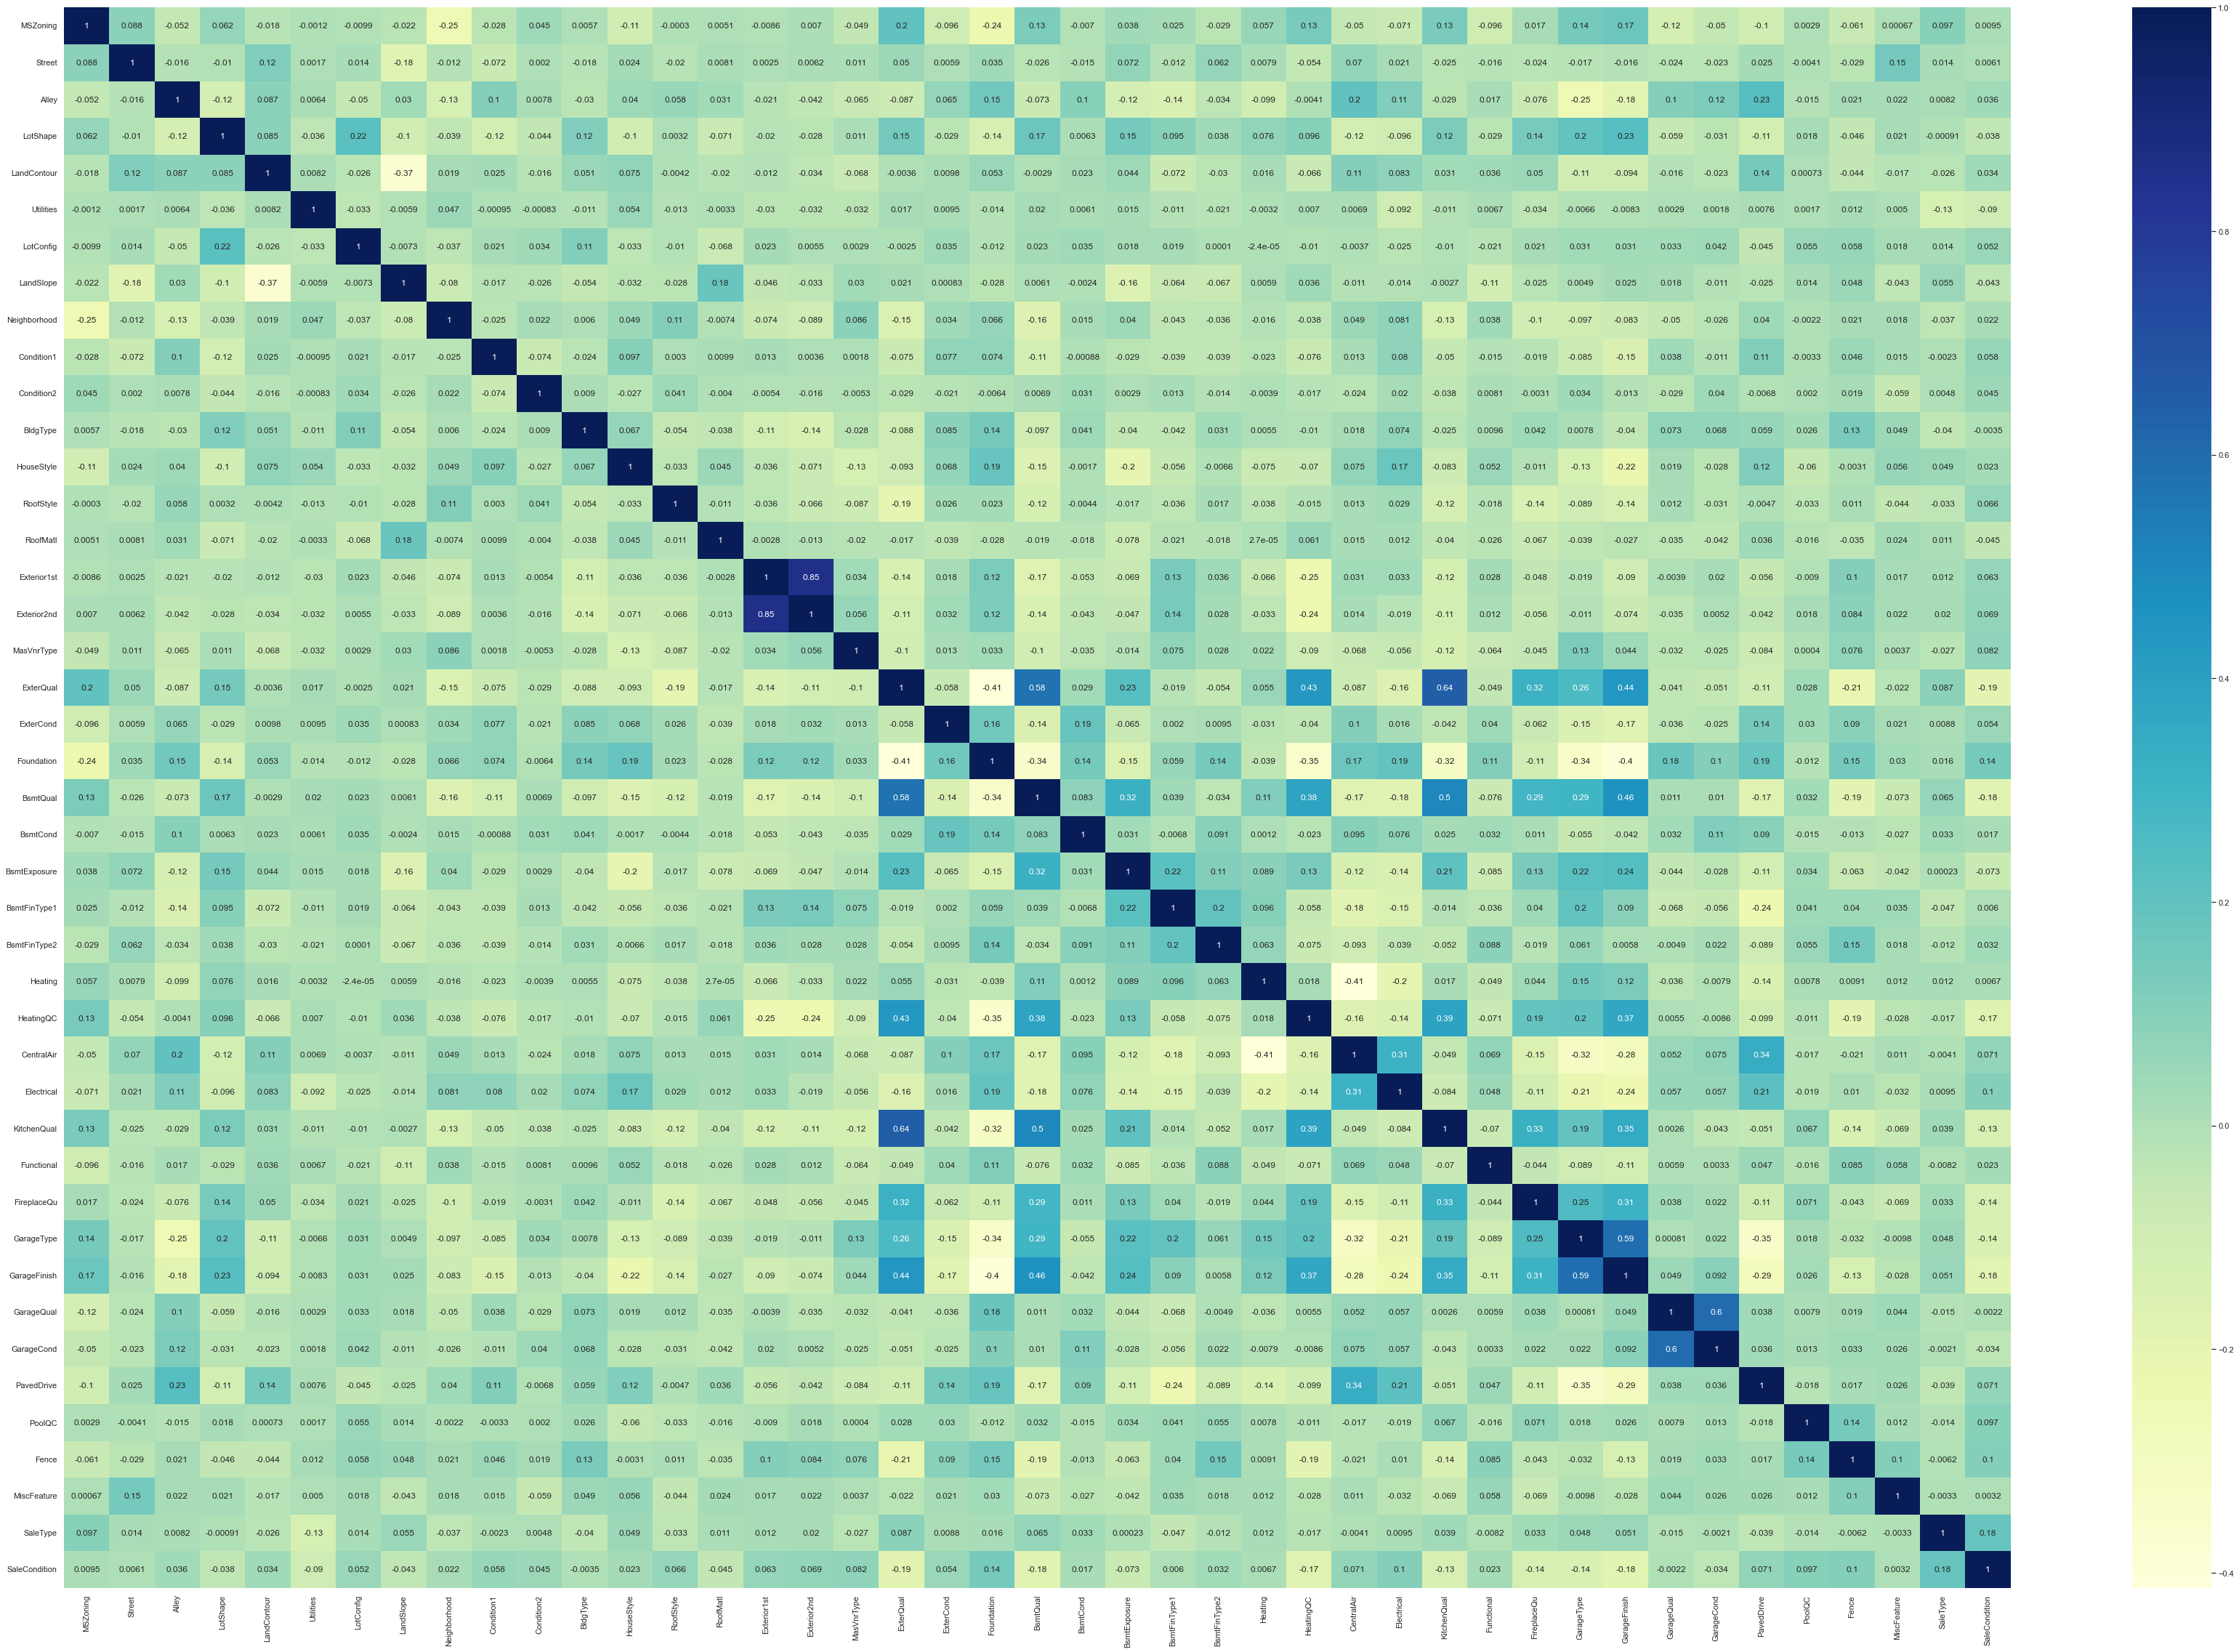

In [214]:
sns.set(rc = {'figure.figsize':(60,40)})
sns.heatmap(object_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [215]:
## Из категориальных признаков наибольшую взаимную корреляцию (0,85) имеют признаки Exterior1st и Exterior2nd. Удалим первый из них.

object_data = object_data.drop(['Exterior1st'], axis=1)
object_data

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      2         3            3          0          4   
1            3       1      2         3            3          0          2   
2            3       1      2         0            3          0          4   
3            3       1      2         0            3          0          0   
4            3       1      2         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      2         3            3          0          4   
1456         3       1      2         3            3          0          4   
1457         3       1      2         3            3          0          4   
1458         3       1      2         3            3          0          4   
1459         3       1      2         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0             0             5           2  ...           1             1   
1             0            24           1  ...           1             1   
2             0             5           2  ...           1             1   
3             0             6           2  ...           5             2   
4             0            15           2  ...           1             1   
...         ...           ...         ...  ...         ...           ...   
1455          0             8           2  ...           1             1   
1456          0            14           2  ...           1             2   
1457          0             6           2  ...           1             1   
1458          0            12           2  ...           1             2   
1459          0             7           2  ...           1             0   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
0              4           4           2       3      4            4   
1              4           4           2       3      4            4   
2              4           4           2       3      4            4   
3              4           4           2       3      4            4   
4              4           4           2       3      4            4   
...          ...         ...         ...     ...    ...          ...   
1455           4           4           2       3      4            4   
1456           4           4           2       3      2            4   
1457           4           4           2       3      0            2   
1458           4           4           2       3      4            4   
1459           4           4           2       3      4            4   

      SaleType  SaleCondition  
0            8              4  
1            8              4  
2            8              4  
3            8              0  
4            8              4  
...        ...            ...  
1455         8              4  
1456         8              4  
1457         8              4  
1458         8              4  
1459         8              4  

[1460 rows x 42 columns]

## 1.4 Итоговые данные

In [233]:
ready_data = pd.merge(cleaned, object_data, how='left', on=None, left_index=True, right_index=True)
ready_data

MSSubClass  LotFrontage  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0             60         65.0     8450            5       2003          2003   
1             20         80.0     9600            8       1976          1976   
2             60         68.0    11250            5       2001          2002   
3             70         60.0     9550            5       1915          1970   
4             60         84.0    14260            5       2000          2000   
...          ...          ...      ...          ...        ...           ...   
1455          60         62.0     7917            5       1999          2000   
1456          20         85.0    13175            6       1978          1988   
1457          70         66.0     9042            9       1941          2006   
1458          20         68.0     9717            6       1950          1996   
1459          20         75.0     9937            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageType  \
0          196.0         706        150          856  ...           1   
1            0.0         978        284         1262  ...           1   
2          162.0         486        434          920  ...           1   
3            0.0         216        540          756  ...           5   
4          350.0         655        490         1145  ...           1   
...          ...         ...        ...          ...  ...         ...   
1455         0.0           0        953          953  ...           1   
1456       119.0         790        589         1542  ...           1   
1457         0.0         275        877         1152  ...           1   
1458         0.0          49          0         1078  ...           1   
1459         0.0         830        136         1256  ...           1   

      GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence  \
0                1           4           4           2       3      4   
1                1           4           4           2       3      4   
2                1           4           4           2       3      4   
3                2           4           4           2       3      4   
4                1           4           4           2       3      4   
...            ...         ...         ...         ...     ...    ...   
1455             1           4           4           2       3      4   
1456             2           4           4           2       3      2   
1457             1           4           4           2       3      0   
1458             2           4           4           2       3      4   
1459             0           4           4           2       3      4   

      MiscFeature  SaleType  SaleCondition  
0               4         8              4  
1               4         8              4  
2               4         8              4  
3               4         8              0  
4               4         8              4  
...           ...       ...            ...  
1455            4         8              4  
1456            4         8              4  
1457            2         8              4  
1458            4         8              4  
1459            4         8              4  

[1429 rows x 69 columns]

#### Коллинеарность

<AxesSubplot:>

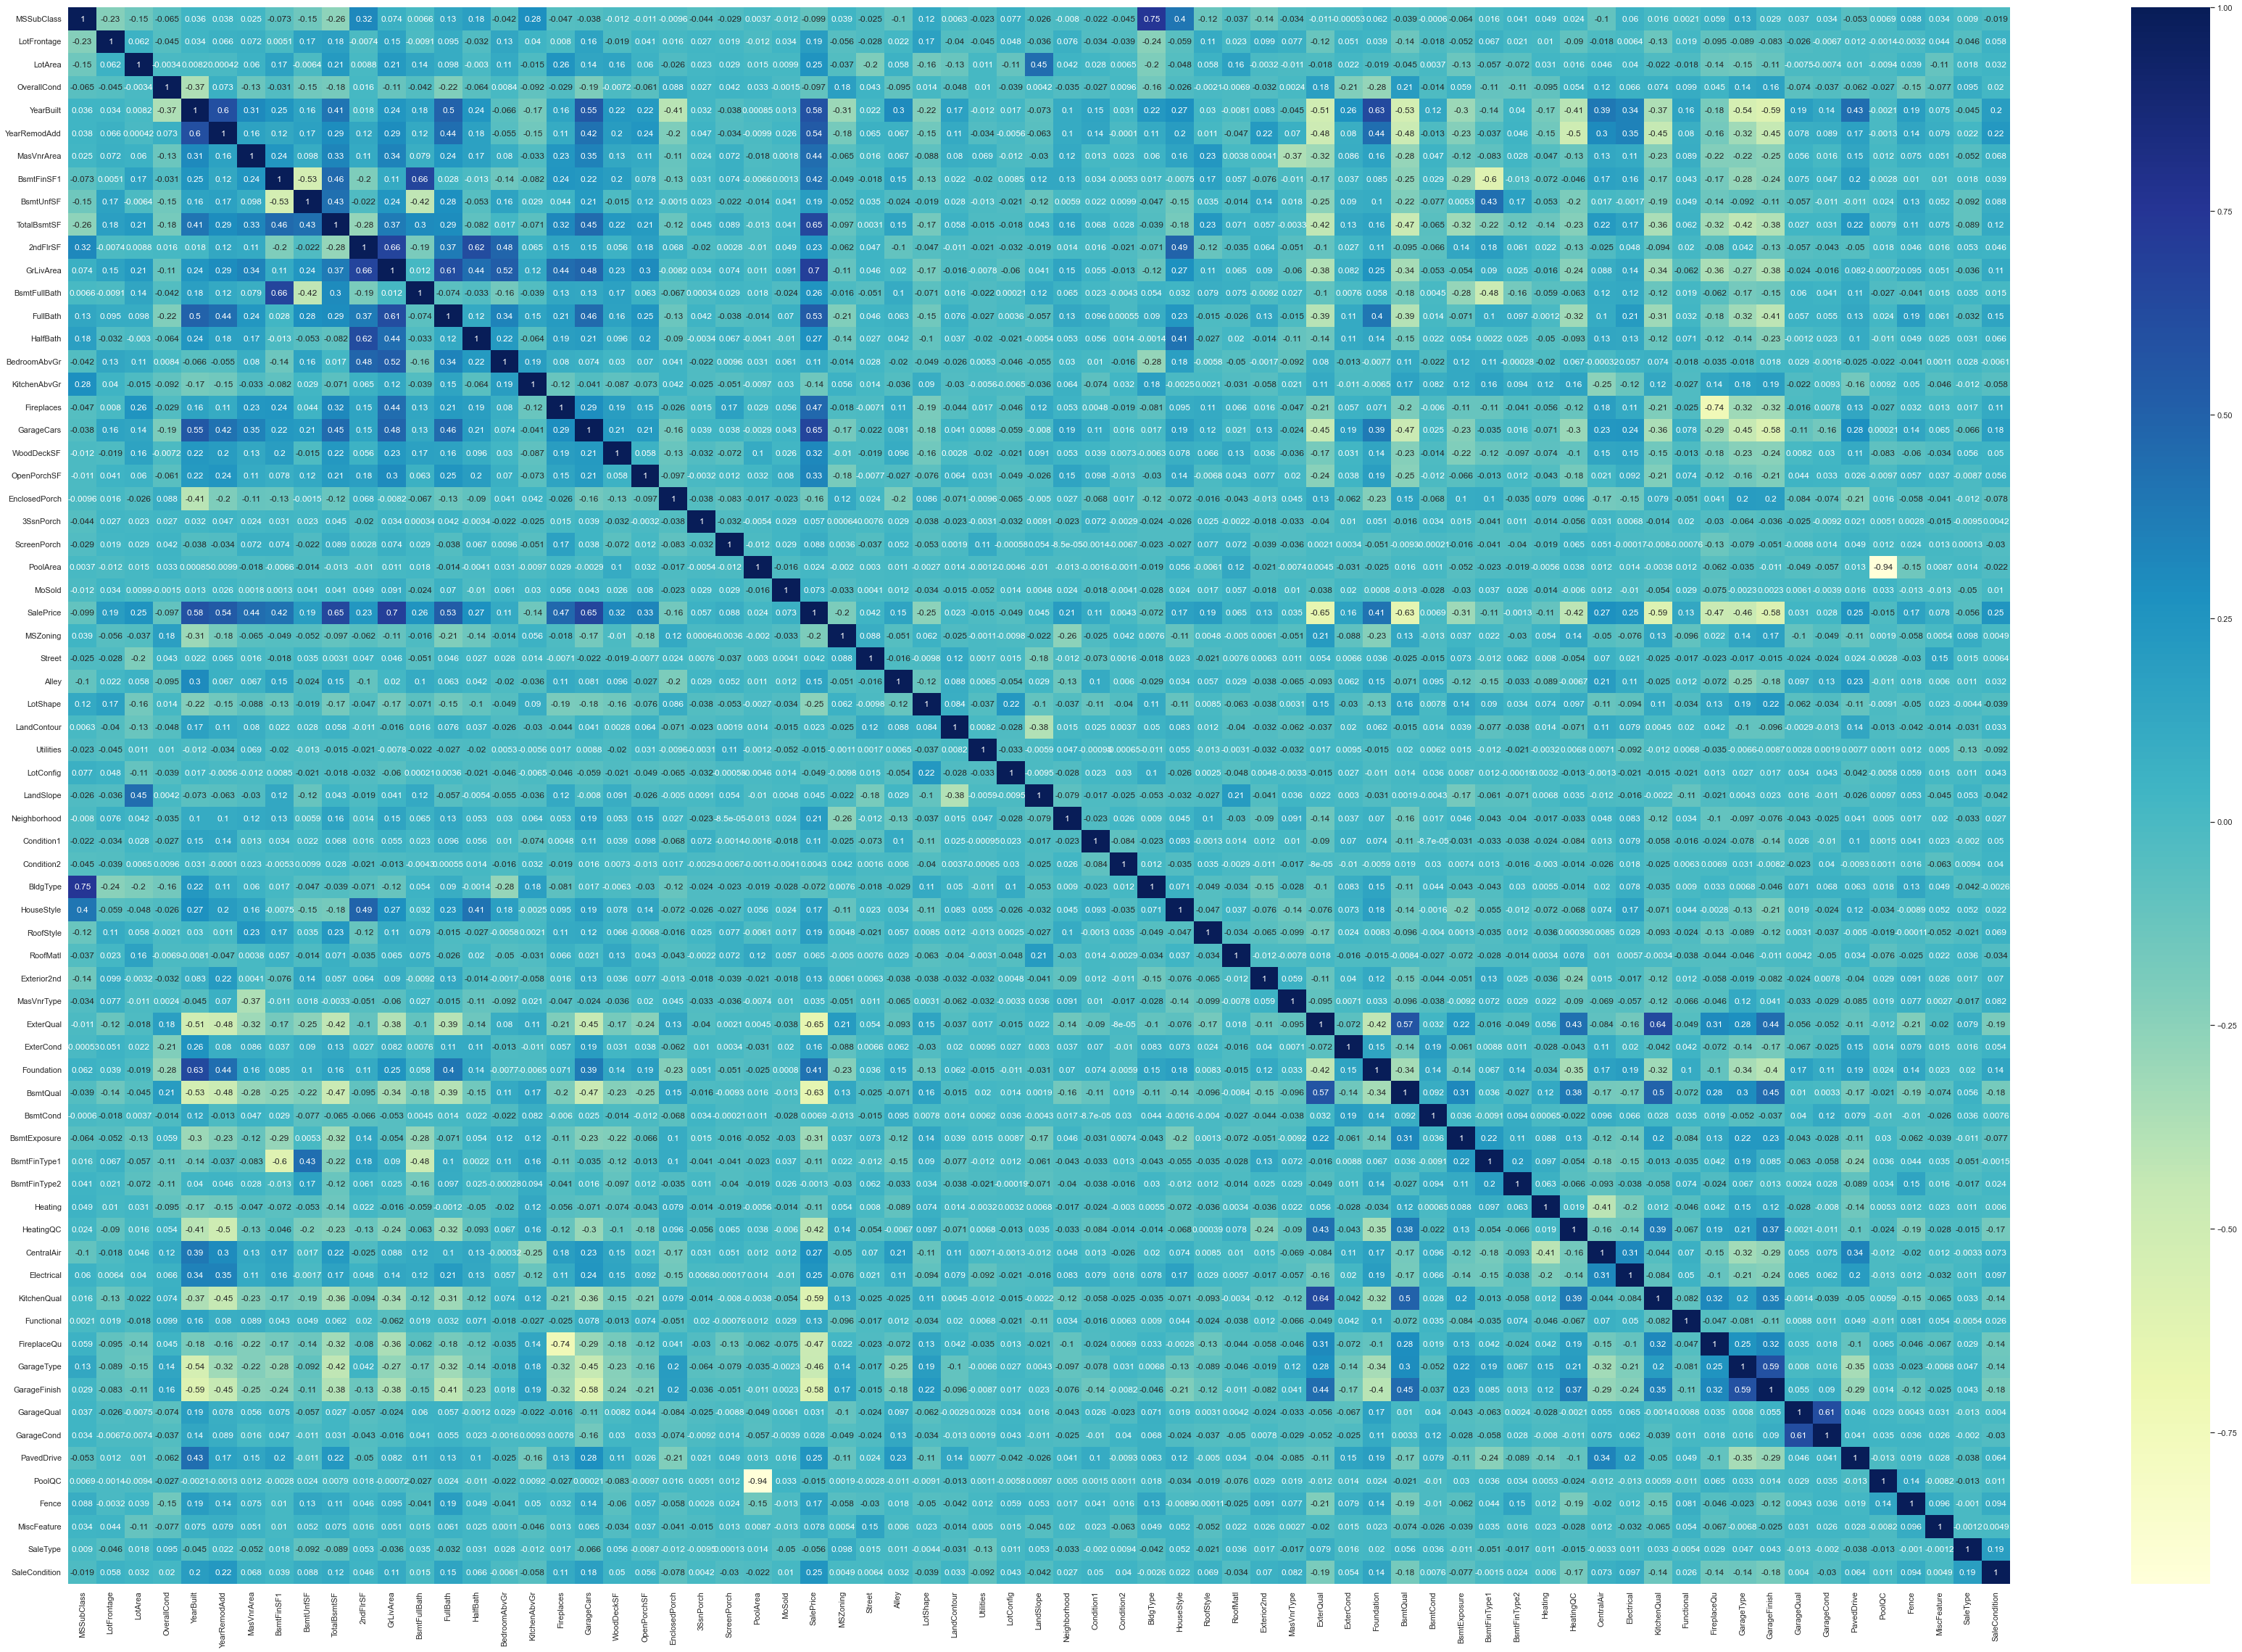

In [277]:
sns.set(rc = {'figure.figsize':(60,40)})
sns.heatmap(ready_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [ ]:
# Имеется пара коллинеарных признаков (0,75): MsSubClass и BldgType. Пока оставим их.

### Размеры трейна и теста

In [265]:
from sklearn.model_selection import train_test_split

y = ready_data["SalePrice"]
X = ready_data.drop(labels = ["SalePrice"],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f"Размер X_train = {X_train.shape}" )
print(f"Размер y_train = {y_train.shape}" )
print(f"Размер X_test = {X_test.shape}" )
print(f"Размер y_test = {y_test.shape}" )


Размер X_train = (1000, 68)
Размер y_train = (1000,)
Размер X_test = (429, 68)
Размер y_test = (429,)


## 1.5 Регуляризация

In [271]:
# применим RobustScaler из-за наличия выбросов

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Обучаем модели, анализируем метрики

In [272]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

regr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

## Линейная регрессия

In [273]:
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
print('LinearRegression')
print('Training data R2:', regr.score(X_train_scaled, y_train))
print('Test data R2:', regr.score(X_test_scaled, y_test))
print(f'MAE: {mean_absolute_error(y_test, regr.predict(X_test_scaled))}')
print(f'MSE: {mean_squared_error(y_test, regr.predict(X_test_scaled))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')

LinearRegression
Training data R2: 0.8985931463697002
Test data R2: 0.886387564399526
MAE: 16660.55006722559
MSE: 492486518.5751354
MAPE: 0.1045
R^2: 0.8864


## Ридж

In [274]:
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print('Ridge')
print('Training data R2:', ridge.score(X_train_scaled, y_train))
print('Test data R2:', ridge.score(X_test_scaled, y_test))
print(f'MAE: {mean_absolute_error(y_test, ridge.predict(X_test_scaled))}')
print(f'MSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')

Ridge
Training data R2: 0.8983856341563573
Test data R2: 0.8873457334697145
MAE: 16634.580097384347
MSE: 488333052.9171782
MAPE: 0.1043
R^2: 0.8873


## Лассо

In [275]:
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print('Lasso')
print('Training data R2:', lasso.score(X_train_scaled, y_train))
print('Test data R2:', lasso.score(X_test_scaled, y_test))
print(f'MAE: {mean_absolute_error(y_test, lasso.predict(X_test_scaled))}')
print(f'MSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')

Lasso
Training data R2: 0.8985925240405344
Test data R2: 0.8864256913989388
MAE: 16657.312524642155
MSE: 492321245.88200754
MAPE: 0.1044
R^2: 0.8864


# Выводы
Линейная регрессия, лассо и гребневая регрессия показали примерно одинаковые результаты: R2-score на уровне 88%, MAPE 10,4%.
Это не слишком высокий результат, очевидно, для его улучшения нужно устранить коллинеарность всех признаков и, возможно, применить различные скейлеры к разным столбцам.
Применение RobustScaler ко всем данным почти не дало увеличения R2-score по сравнению с StandardScaler.